In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('Data/high_diamond_ranked_10min.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [9]:
wins = df[['gameId','blueWins']]
vision = df[['gameId','blueWardsPlaced','blueWardsDestroyed','redWardsPlaced','redWardsDestroyed']]
carnage = df[['gameId','blueFirstBlood','blueKills','blueDeaths','blueAssists','redFirstBlood','redKills','redDeaths','redAssists']]
economy = df[['gameId','blueTotalMinionsKilled','blueCSPerMin','blueGoldPerMin','redTotalMinionsKilled','redCSPerMin','redGoldPerMin']]

gameId  blueTotalMinionsKilled  blueCSPerMin  blueGoldPerMin  \
0  4519157822                     195          19.5          1721.0   
1  4523371949                     174          17.4          1471.2   
2  4521474530                     186          18.6          1611.3   
3  4524384067                     201          20.1          1515.7   
4  4436033771                     210          21.0          1640.0   

   redTotalMinionsKilled  redCSPerMin  redGoldPerMin  
0                    197         19.7         1656.7  
1                    240         24.0         1762.0  
2                    203         20.3         1728.5  
3                    235         23.5         1647.8  
4                    225         22.5         1740.4

# Questions to be asked:
## 1. Without considering gameplay specifically, is Red or Blue side more likely to win at Diamond level gameplay?
## 2. How important is vision at Diamond Rank?
## 3. Does the team with more kills always win, and if they don't why not?
## 4. Are kills or CSing well more important at Diamond level play?

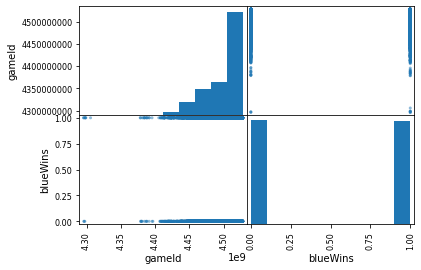

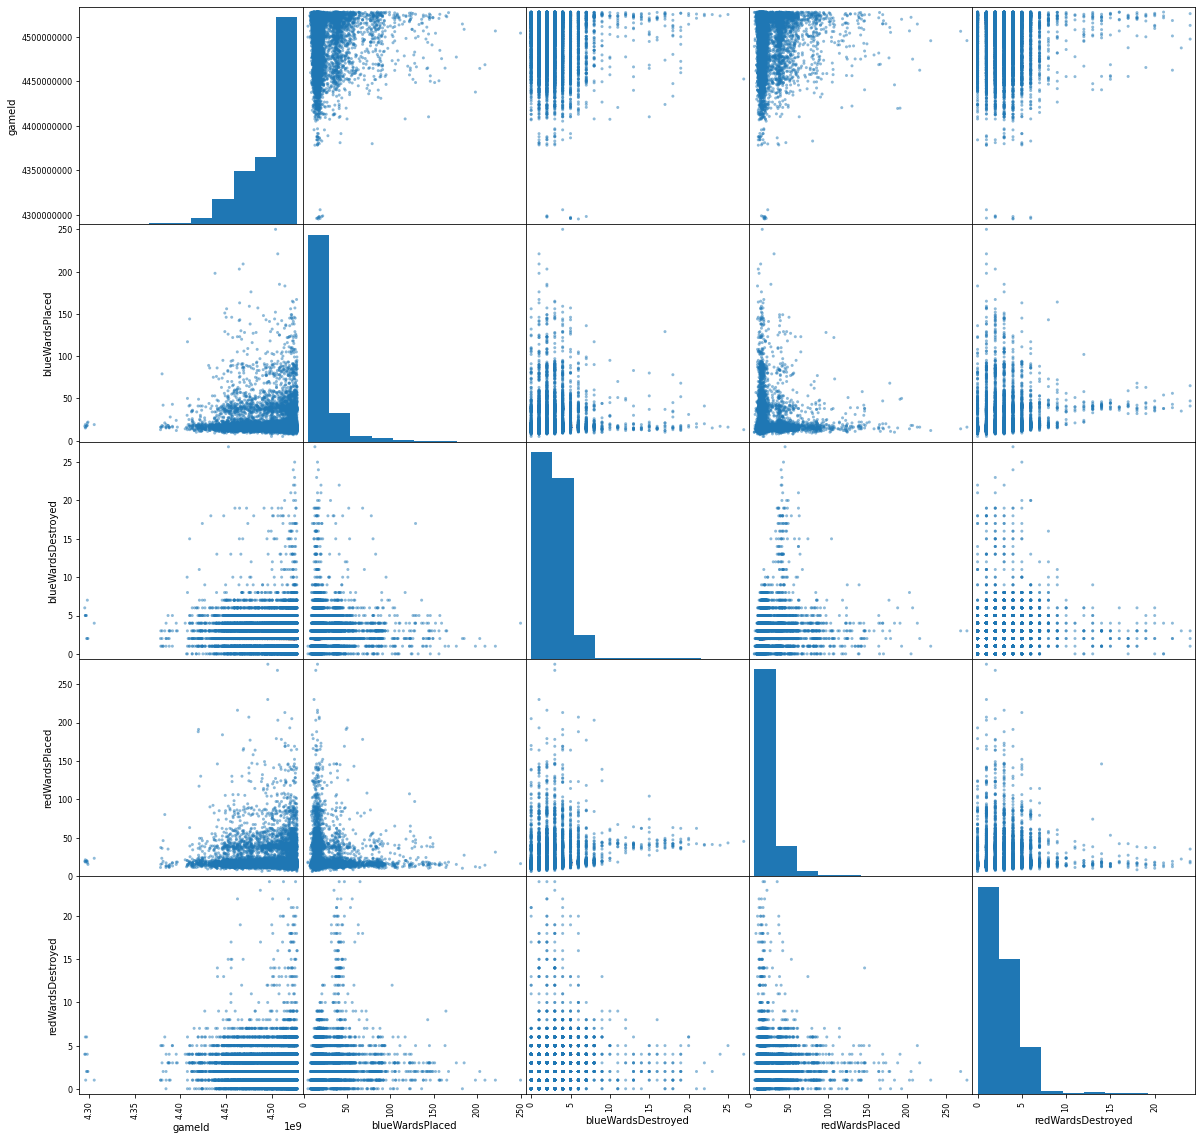

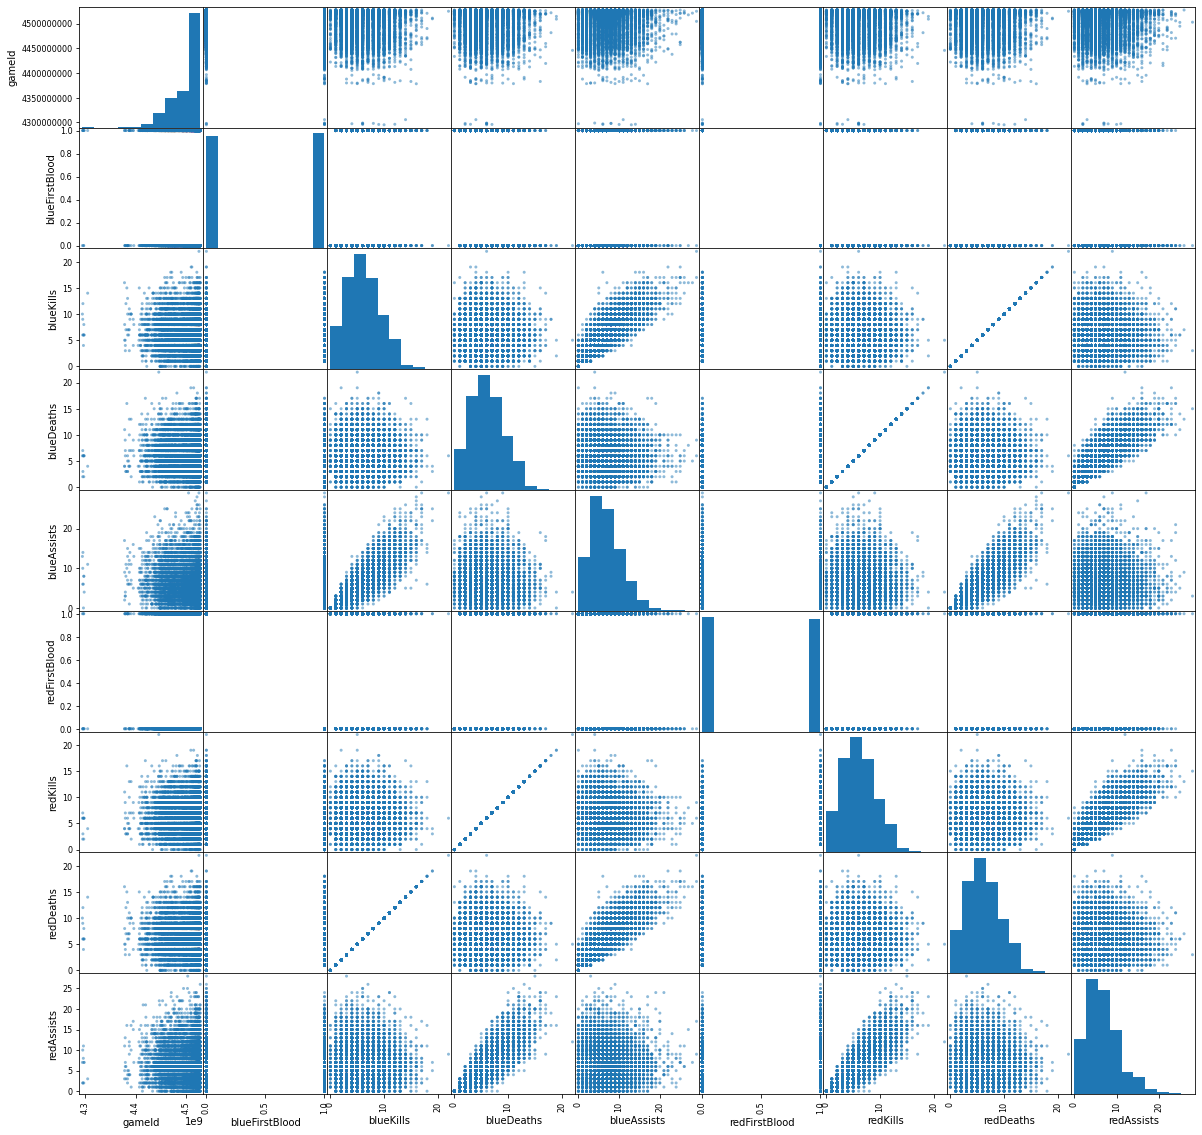

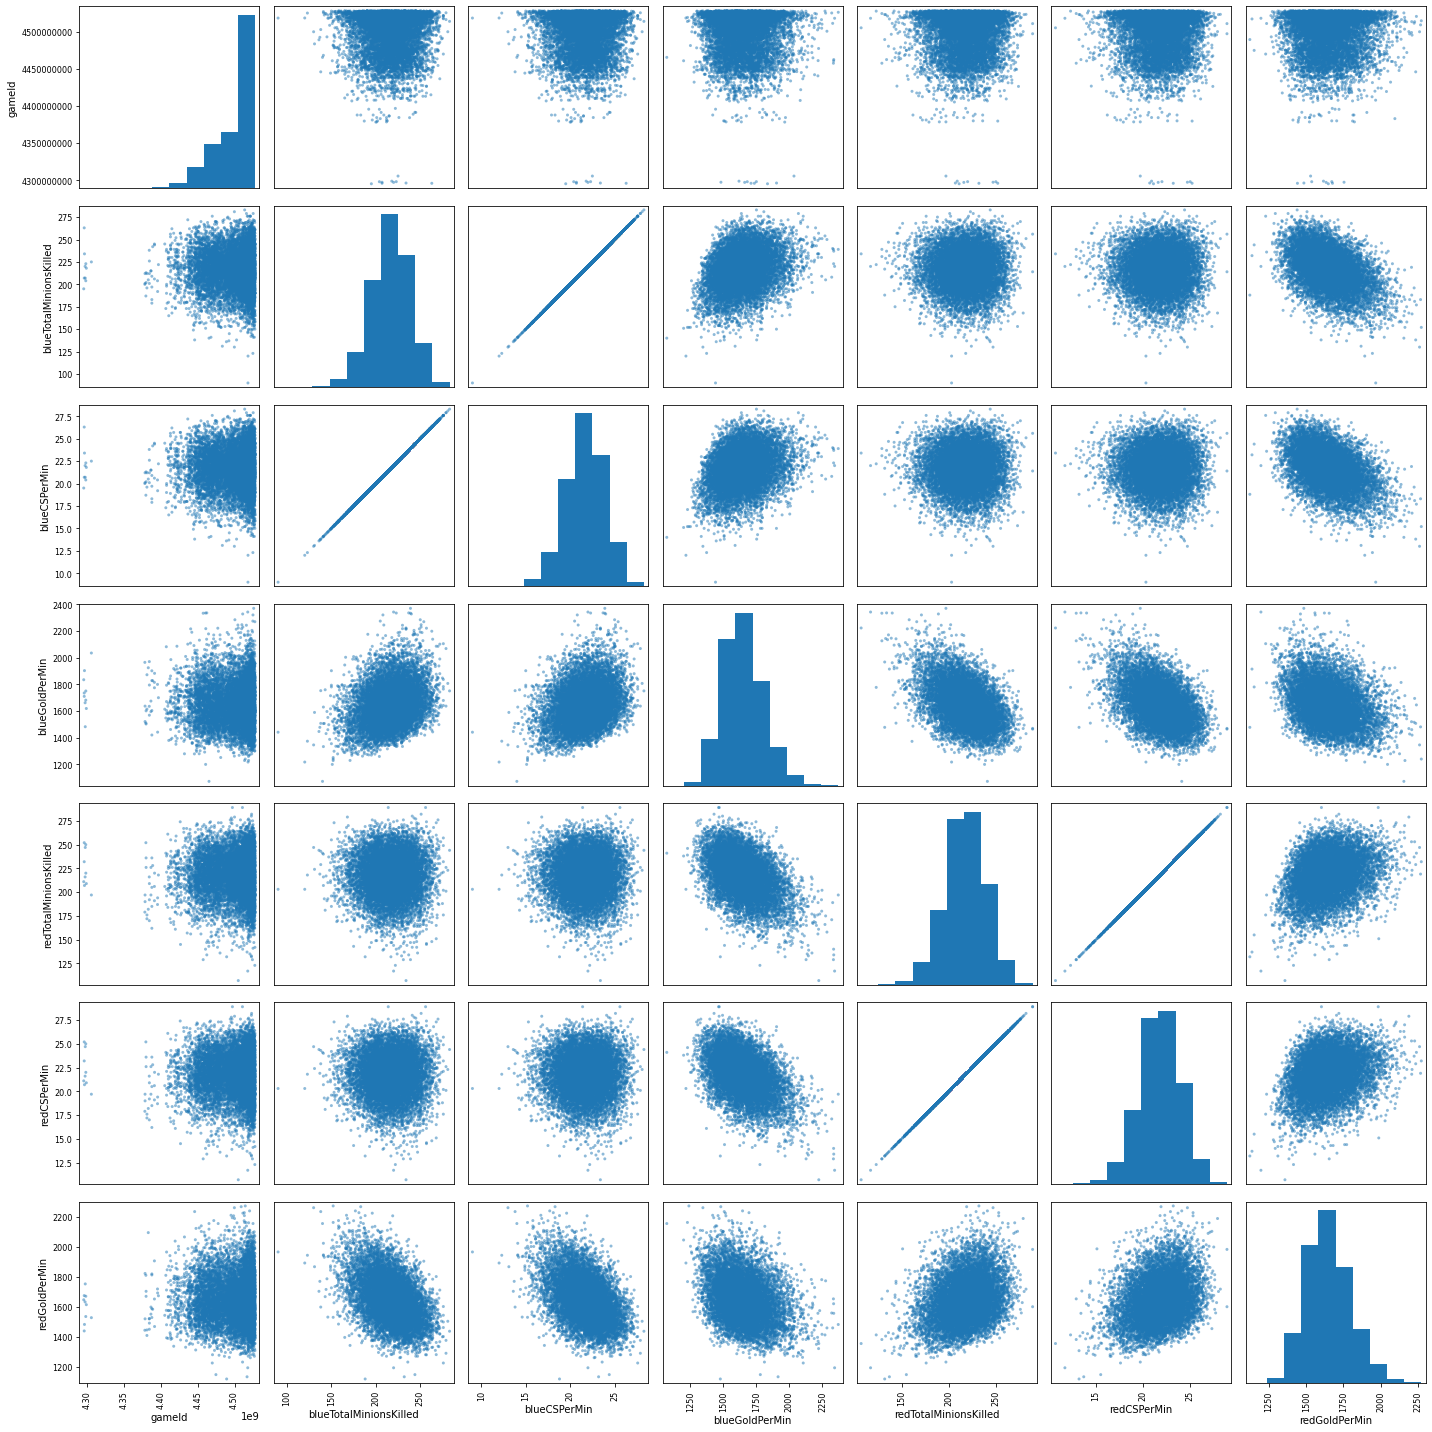

In [11]:
pd.plotting.scatter_matrix(wins)
pd.plotting.scatter_matrix(vision, figsize = (20,20))
pd.plotting.scatter_matrix(carnage, figsize = (20,20))
pd.plotting.scatter_matrix(economy, figsize = (20,20))
plt.tight_layout();

In [12]:
percent_wins_of_sample = wins['blueWins'].sum()/len(wins['blueWins'])

In [13]:
percent_wins_of_sample

0.4990383642069035

In [65]:
blue_vision_mean = vision['blueWardsPlaced'].mean()
red_vision_mean = vision['redWardsPlaced'].mean()
blue_vision_var = vision['blueWardsPlaced'].var()
blue_vision_st = vision['blueWardsPlaced'].std()
red_vision_var = vision['redWardsPlaced'].var()
red_vision_st = vision['redWardsPlaced'].std()

In [66]:
print(blue_vision_mean)
print(blue_vision_var)
print(blue_vision_st)
print(red_vision_mean)
print(red_vision_var)
print(red_vision_st)

22.28828828828829
324.69072230767404
18.019176515803213
22.367952221884806
340.6766039353567
18.457426796153268


In [43]:
wins_only = wins[wins['blueWins'] > 0]
loss_only = wins[wins['blueWins'] == 0]

In [41]:
blue_wins_vision = wins_only.set_index('gameId').join(vision.set_index('gameId')[['blueWardsPlaced','blueWardsDestroyed']], on='gameId')

In [44]:
blue_losses_vision = loss_only.set_index('gameId').join(vision.set_index('gameId')[['blueWardsPlaced','blueWardsDestroyed']], on='gameId')

In [46]:
blue_loss_mean = blue_losses_vision['blueWardsPlaced'].mean()
blue_loss_var = blue_losses_vision['blueWardsPlaced'].var()
blue_loss_st = blue_losses_vision['blueWardsPlaced'].std()

In [47]:
print(blue_loss_mean)
print(blue_loss_var)
print(blue_loss_st)

22.28672459082643
339.7166810439758
18.431404749610806


In [48]:
blue_win_mean = blue_wins_vision['blueWardsPlaced'].mean()
blue_win_var = blue_wins_vision['blueWardsPlaced'].var()
blue_win_st = blue_wins_vision['blueWardsPlaced'].std()

In [49]:
print(blue_win_mean)
print(blue_win_var)
print(blue_win_st)

22.289858012170384
309.6727110774248
17.597520026339645


In [89]:
blue_vision = vision[['blueWardsPlaced','blueWardsDestroyed']]
red_vision = vision[['redWardsPlaced','redWardsDestroyed']]
blue_vision

blueWardsPlaced  blueWardsDestroyed
0                  28                   2
1                  12                   1
2                  15                   0
3                  43                   1
4                  75                   4
...               ...                 ...
9874               17                   2
9875               54                   0
9876               23                   1
9877               14                   4
9878               18                   0

[9879 rows x 2 columns]

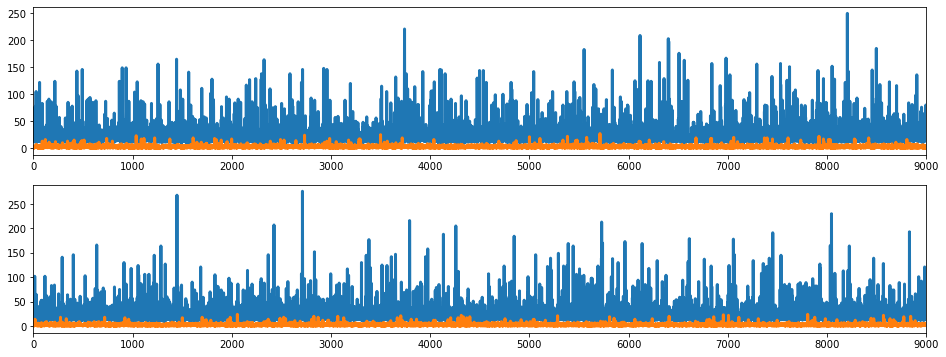

In [54]:
x = np.linspace(0, 9879, num = 1000)

fig, axs = plt.subplots(2, figsize = (16,6))
axs[0].plot(blue_vision, linewidth=3)
axs[0].set_xlim(0, 9000)

axs[1].plot(red_vision, linewidth=3)
axs[1].set_xlim(0, 9000)

plt.show();

In [61]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [62]:
blue_better_vision = count_winning_pairs(vision[['blueWardsPlaced']],vision[['redWardsPlaced']])
red_better_vision = count_winning_pairs(vision[['redWardsPlaced']],vision[['blueWardsPlaced']])

8163.5
609.5
3164.0
9091.0
9622.5
6397.5
6397.5
4373.0
4373.0
1178.0
7436.0
8314.0
6397.5
2039.0
3164.0
5503.5
2039.0
9091.0
7680.0
266.5
2039.0
1178.0
5503.5
9638.5
8314.0
5503.5
6397.5
7024.5
9782.5
6397.5
7831.0
5503.5
609.5
3164.0
8900.5
8001.0
609.5
7436.0
266.5
6397.5
8163.5
8477.5
6397.5
609.5
6397.5
8974.5
2039.0
7024.5
3164.0
4373.0
2039.0
6397.5
7831.0
8578.5
2039.0
4373.0
5503.5
7024.5
8195.0
609.5
6397.5
8001.0
6397.5
9807.5
609.5
9354.5
7024.5
8281.5
2039.0
7024.5
4373.0
8477.5
6397.5
1178.0
3164.0
9302.0
2039.0
5503.5
6397.5
5503.5
9091.0
609.5
7436.0
6397.5
4373.0
2039.0
609.5
4373.0
3164.0
1178.0
9683.0
5503.5
4373.0
2039.0
2039.0
5503.5
4373.0
8900.5
4373.0
4373.0
4373.0
2039.0
1178.0
6397.5
8001.0
609.5
5503.5
7024.5
609.5
2039.0
7024.5
4373.0
6397.5
5503.5
8281.5
4373.0
7024.5
2039.0
609.5
8227.0
6397.5
2039.0
2039.0
1178.0
4373.0
8697.0
8900.5
6397.5
8900.5
6397.5
5503.5
3164.0
6397.5
9091.0
1178.0
1178.0
7436.0
3164.0
5503.5
8163.5
609.5
9724.0
3164.0
3164.0
7929.0

2039.0
9654.5
266.5
609.5
4373.0
1178.0
1178.0
5503.5
5503.5
7436.0
3164.0
5503.5
7831.0
4373.0
9039.5
3164.0
7024.5
609.5
5503.5
9497.5
7024.5
609.5
7436.0
4373.0
5503.5
9354.5
266.5
2039.0
8281.5
7024.5
4373.0
9419.0
3164.0
2039.0
5503.5
9302.0
266.5
7436.0
609.5
2039.0
7024.5
1178.0
3164.0
1178.0
5503.5
2039.0
4373.0
9376.0
2039.0
1178.0
4373.0
4373.0
7680.0
609.5
1178.0
6397.5
6397.5
7024.5
3164.0
7436.0
2039.0
1178.0
6397.5
4373.0
8697.0
5503.5
2039.0
8974.5
5503.5
1178.0
2039.0
2039.0
2039.0
9091.0
5503.5
8001.0
8314.0
7024.5
609.5
8411.5
6397.5
7024.5
6397.5
6397.5
4373.0
6397.5
3164.0
7024.5
3164.0
5503.5
609.5
8807.5
9376.0
9190.5
3164.0
266.5
3164.0
609.5
2039.0
1178.0
8974.5
609.5
4373.0
3164.0
4373.0
266.5
6397.5
3164.0
8136.0
2039.0
3164.0
2039.0
9793.0
8974.5
5503.5
8060.5
8697.0
266.5
8359.0
7436.0
8314.0
7024.5
1178.0
7024.5
9376.0
4373.0
7024.5
6397.5
103.0
2039.0
266.5
1178.0
3164.0
5503.5
8411.5
4373.0
2039.0
9479.0
4373.0
4373.0
2039.0
5503.5
1178.0
2039.0
6397.5
90

4373.0
6397.5
6397.5
5503.5
1178.0
266.5
4373.0
8697.0
3164.0
2039.0
3164.0
3164.0
7436.0
1178.0
8807.5
9190.5
8900.5
9803.5
5503.5
4373.0
103.0
8974.5
266.5
266.5
4373.0
7680.0
4373.0
4373.0
5503.5
4373.0
6397.5
3164.0
3164.0
2039.0
8314.0
5503.5
266.5
4373.0
7024.5
3164.0
3164.0
9587.5
5503.5
3164.0
609.5
7024.5
7680.0
4373.0
9277.5
7436.0
7024.5
103.0
2039.0
5503.5
8001.0
9039.5
7436.0
7436.0
266.5
8105.5
6397.5
2039.0
6397.5
8359.0
5503.5
3164.0
7929.0
9161.5
266.5
7436.0
1178.0
7024.5
9302.0
6397.5
3164.0
4373.0
8359.0
8578.5
3164.0
2039.0
7024.5
4373.0
3164.0
7024.5
36.0
2039.0
4373.0
5503.5
5503.5
8359.0
4373.0
8477.5
4373.0
9219.5
5503.5
8227.0
609.5
6397.5
4373.0
5503.5
5503.5
7680.0
4373.0
4373.0
3164.0
6397.5
4373.0
1178.0
6397.5
5503.5
8195.0
5503.5
4373.0
5503.5
5503.5
609.5
8105.5
1178.0
3164.0
609.5
7436.0
5503.5
7024.5
4373.0
6397.5
3164.0
8195.0
609.5
3164.0
3164.0
6397.5
8227.0
3164.0
1178.0
7024.5
266.5
1178.0
7436.0
4373.0
6397.5
6397.5
5503.5
3164.0
103.0
4373.0
92

9675.0
7680.0
609.5
7024.5
5503.5
5503.5
6397.5
4373.0
7024.5
2039.0
609.5
266.5
1178.0
1178.0
8314.0
3164.0
1178.0
3164.0
7024.5
3164.0
4373.0
2039.0
4373.0
4373.0
3164.0
4373.0
266.5
8477.5
9565.5
4373.0
3164.0
8411.5
9737.0
6397.5
7680.0
8578.5
609.5
4373.0
4373.0
9737.0
266.5
9807.5
4373.0
2039.0
7436.0
609.5
5503.5
1178.0
9793.0
6397.5
1178.0
266.5
8314.0
5503.5
7024.5
2039.0
2039.0
3164.0
9737.0
4373.0
3164.0
7831.0
5503.5
2039.0
3164.0
4373.0
7831.0
1178.0
9161.5
1178.0
8195.0
6397.5
103.0
3164.0
2039.0
4373.0
4373.0
7436.0
7436.0
8697.0
8807.5
4373.0
2039.0
8807.5
5503.5
1178.0
4373.0
5503.5
4373.0
3164.0
8136.0
9729.5
3164.0
3164.0
3164.0
2039.0
3164.0
1178.0
4373.0
609.5
7024.5
1178.0
609.5
1178.0
6397.5
7436.0
5503.5
7436.0
7831.0
9328.0
4373.0
7024.5
4373.0
4373.0
4373.0
4373.0
1178.0
5503.5
4373.0
1178.0
3164.0
2039.0
5503.5
1178.0
3164.0
6397.5
103.0
8697.0
4373.0
3164.0
1178.0
6397.5
1178.0
1178.0
5503.5
7436.0
3164.0
6397.5
266.5
4373.0
7436.0
7436.0
8974.5
2039.0
2039.

9715.5
7024.5
9091.0
609.5
9724.0
609.5
9871.5
1178.0
5503.5
5503.5
9871.0
7680.0
266.5
36.0
8900.5
266.5
3164.0
8105.5
9748.5
2039.0
1178.0
12.0
2039.0
3164.0
3164.0
6397.5
4373.0
9091.0
2039.0
4373.0
4373.0
7436.0
5503.5
609.5
3164.0
2039.0
9638.5
5503.5
4373.0
1178.0
5503.5
2039.0
2039.0
1178.0
9601.0
1178.0
7436.0
609.5
9479.0
4373.0
7024.5
2039.0
1178.0
6397.5
1178.0
5503.5
6397.5
8001.0
609.5
5503.5
8227.0
1178.0
2039.0
4373.0
1178.0
2039.0
4373.0
3164.0
3164.0
5503.5
4373.0
6397.5
7680.0
3164.0
7024.5
2039.0
609.5
3164.0
6397.5
609.5
5503.5
3164.0
3164.0
7436.0
8900.5
5503.5
4373.0
609.5
3164.0
4373.0
6397.5
8900.5
1178.0
2039.0
5503.5
8807.5
4373.0
4373.0
8697.0
6397.5
3164.0
3164.0
5503.5
7831.0
3164.0
2039.0
1178.0
9395.5
4373.0
3164.0
2039.0
4373.0
6397.5
3164.0
9864.0
4373.0
3164.0
2039.0
3164.0
8477.5
1178.0
6397.5
3164.0
5503.5
3164.0
2039.0
8477.5
266.5
3164.0
2039.0
6397.5
4373.0
6397.5
3164.0
4373.0
3164.0
3164.0
9715.5
4373.0
609.5
7024.5
8477.5
6397.5
8105.5
609.5
11

4373.0
1178.0
1178.0
3164.0
3164.0
609.5
1178.0
8411.5
609.5
2039.0
3164.0
8697.0
9683.0
5503.5
4373.0
9561.0
4373.0
2039.0
5503.5
5503.5
266.5
1178.0
6397.5
6397.5
266.5
3164.0
7024.5
1178.0
1178.0
6397.5
7024.5
609.5
609.5
609.5
2039.0
6397.5
5503.5
9376.0
4373.0
9219.5
3164.0
7024.5
9823.0
7929.0
8195.0
3164.0
4373.0
6397.5
3164.0
5503.5
2039.0
5503.5
7831.0
8060.5
609.5
5503.5
3164.0
2039.0
609.5
3164.0
5503.5
8578.5
7024.5
5503.5
8578.5
4373.0
3164.0
7024.5
5503.5
9702.5
4373.0
4373.0
6397.5
8105.5
3164.0
7024.5
2039.0
1178.0
3164.0
609.5
7680.0
5503.5
1178.0
7436.0
1178.0
9575.0
7831.0
1178.0
4373.0
6397.5
9302.0
9249.5
5503.5
4373.0
103.0
3164.0
4373.0
4373.0
3164.0
1178.0
9446.5
7024.5
8697.0
7680.0
3164.0
4373.0
7436.0
8105.5
609.5
3164.0
4373.0
7024.5
9376.0
3164.0
9161.5
1178.0
9513.5
5503.5
3164.0
9249.5
3164.0
5503.5
4373.0
609.5
7436.0
6397.5
8578.5
4373.0
3164.0
9852.5
9130.0
6397.5
5503.5
4373.0
4373.0
4373.0
609.5
7929.0
3164.0
266.5
7436.0
3164.0
2039.0
5503.5
5503.5


8001.0
8900.5
2039.0
9277.5
4373.0
9691.0
103.0
609.5
103.0
2039.0
4373.0
5503.5
609.5
5503.5
8477.5
8227.0
3164.0
3164.0
266.5
9715.5
3164.0
6397.5
7436.0
2039.0
4373.0
5503.5
2039.0
5503.5
8697.0
5503.5
8163.5
4373.0
5503.5
2039.0
9513.5
4373.0
3164.0
3164.0
5503.5
8195.0
4373.0
4373.0
6397.5
2039.0
4373.0
3164.0
1178.0
4373.0
6397.5
5503.5
2039.0
6397.5
4373.0
3164.0
3164.0
9638.5
1178.0
4373.0
6397.5
8314.0
4373.0
9792.0
4373.0
6397.5
3164.0
3164.0
1178.0
7680.0
3164.0
5503.5
7436.0
8578.5
609.5
1178.0
7436.0
2039.0
8974.5
3164.0
8974.5
2039.0
609.5
4373.0
4373.0
7024.5
9376.0
5503.5
7680.0
4373.0
5503.5
7436.0
7929.0
3164.0
3164.0
2039.0
7024.5
2039.0
8281.5
1178.0
8900.5
1178.0
2039.0
7436.0
3164.0
7024.5
2039.0
9219.5
6397.5
7929.0
1178.0
609.5
4373.0
3164.0
4373.0
3164.0
4373.0
8578.5
8477.5
4373.0
6397.5
8163.5
609.5
7024.5
2039.0
6397.5
1178.0
7436.0
3164.0
9328.0
4373.0
7024.5
6397.5
3164.0
3164.0
5503.5
3164.0
5503.5
5503.5
7024.5
8256.0
1178.0
4373.0
609.5
2039.0
9601.0
91

7426.0
2021.0
7040.5
3116.5
616.5
8468.5
4352.5
6383.5
1187.0
1187.0
2021.0
5474.0
2021.0
4352.5
9516.0
616.5
9334.0
2021.0
1187.0
8999.5
3116.5
5474.0
9458.0
7040.5
7040.5
4352.5
5474.0
9355.0
106.0
1187.0
9644.0
1187.0
6383.5
3116.5
7040.5
4352.5
5474.0
7671.0
273.5
5474.0
1187.0
1187.0
5474.0
7040.5
273.5
6383.5
2021.0
1187.0
8999.5
9736.5
3116.5
9851.5
5474.0
8095.0
106.0
9117.0
5474.0
9516.0
106.0
5474.0
273.5
616.5
4352.5
616.5
8539.5
8095.0
7040.5
8239.5
5474.0
4352.5
8327.0
106.0
2021.0
1187.0
3116.5
9692.5
2021.0
4352.5
8360.0
1187.0
1187.0
4352.5
9292.5
5474.0
3116.5
273.5
2021.0
6383.5
4352.5
2021.0
2021.0
5474.0
1187.0
4352.5
616.5
5474.0
7837.5
3116.5
3116.5
4352.5
1187.0
4352.5
9311.5
7040.5
1187.0
1187.0
616.5
2021.0
4352.5
2021.0
3116.5
3116.5
5474.0
616.5
4352.5
616.5
2021.0
4352.5
9868.5
4352.5
273.5
2021.0
7040.5
3116.5
8619.5
6383.5
4352.5
4352.5
273.5
9067.5
5474.0
1187.0
5474.0
3116.5
4352.5
9159.5
3116.5
7671.0
9423.0
4352.5
8406.0
7671.0
5474.0
4352.5
106.0
5474

4352.5
2021.0
2021.0
7040.5
3116.5
8619.5
2021.0
2021.0
616.5
8999.5
2021.0
2021.0
7952.5
2021.0
3116.5
4352.5
3116.5
616.5
1187.0
8619.5
2021.0
2021.0
616.5
8915.5
5474.0
9789.0
8037.5
3116.5
5474.0
5474.0
8037.5
4352.5
3116.5
1187.0
1187.0
9879.0
8722.5
3116.5
4352.5
8468.5
1187.0
6383.5
7837.5
2021.0
2021.0
8468.5
7426.0
4352.5
5474.0
2021.0
1187.0
8999.5
2021.0
616.5
6383.5
9767.0
8915.5
1187.0
6383.5
7040.5
6383.5
4352.5
1187.0
273.5
4352.5
8827.0
8722.5
2021.0
8999.5
4352.5
1187.0
38.5
5474.0
2021.0
7040.5
6383.5
3116.5
1187.0
5474.0
4352.5
5474.0
3116.5
106.0
7837.5
6383.5
9405.5
2021.0
2021.0
1187.0
6383.5
4352.5
5474.0
7040.5
1187.0
6383.5
9680.5
2021.0
3116.5
4352.5
3116.5
3116.5
3116.5
3116.5
273.5
7426.0
2021.0
5474.0
6383.5
8239.5
8239.5
9117.0
1187.0
4352.5
1187.0
6383.5
9405.5
7426.0
9756.5
8539.5
5474.0
3116.5
8143.5
4352.5
3116.5
4352.5
106.0
7040.5
8827.0
6383.5
8827.0
6383.5
4352.5
7426.0
1187.0
5474.0
3116.5
9516.0
1187.0
616.5
7671.0
3116.5
7040.5
6383.5
7040.5
118

2021.0
8999.5
6383.5
7426.0
1187.0
2021.0
5474.0
3116.5
5474.0
4352.5
5474.0
5474.0
4352.5
7952.5
6383.5
1187.0
2021.0
2021.0
6383.5
2021.0
273.5
3116.5
7426.0
9067.5
9355.0
9546.0
5474.0
1187.0
7426.0
5474.0
9311.5
2021.0
6383.5
7040.5
1187.0
6383.5
3116.5
3116.5
6383.5
3116.5
5474.0
5474.0
3116.5
7040.5
4352.5
8722.5
3116.5
8270.0
3116.5
9644.0
7952.5
3116.5
7426.0
3116.5
5474.0
2021.0
8999.5
3116.5
2021.0
8327.0
4352.5
2021.0
3116.5
4352.5
6383.5
3116.5
1187.0
1187.0
6383.5
1187.0
4352.5
7426.0
3116.5
6383.5
4352.5
2021.0
2021.0
3116.5
7426.0
3116.5
616.5
3116.5
8539.5
7040.5
616.5
5474.0
4352.5
3116.5
2021.0
5474.0
8722.5
3116.5
7837.5
6383.5
2021.0
2021.0
5474.0
6383.5
4352.5
8239.5
8300.5
7837.5
3116.5
8539.5
3116.5
8827.0
4352.5
4352.5
4352.5
7040.5
3116.5
1187.0
7040.5
9611.5
9245.5
616.5
4352.5
7426.0
3116.5
5474.0
2021.0
8827.0
6383.5
4352.5
9876.0
3116.5
2021.0
5474.0
616.5
3116.5
5474.0
7040.5
3116.5
1187.0
4352.5
5474.0
6383.5
6383.5
4352.5
3116.5
6383.5
4352.5
6383.5
3116

9706.0
5474.0
616.5
9477.5
7426.0
3116.5
1187.0
4352.5
1187.0
6383.5
4352.5
7040.5
7426.0
8037.5
6383.5
6383.5
4352.5
6383.5
9423.0
4352.5
2021.0
7040.5
4352.5
1187.0
1187.0
4352.5
5474.0
9334.0
7426.0
7040.5
2021.0
7671.0
6383.5
1187.0
4352.5
9768.0
273.5
5474.0
5474.0
6383.5
616.5
9159.5
9768.0
8239.5
2021.0
3116.5
6383.5
7426.0
9245.5
7040.5
8999.5
3116.5
273.5
8827.0
2.5
3116.5
3116.5
8722.5
5474.0
3116.5
1187.0
9270.0
5474.0
7671.0
9117.0
4352.5
9477.5
4352.5
4352.5
5474.0
2021.0
6383.5
7426.0
3116.5
616.5
9245.5
3116.5
616.5
5474.0
9670.5
7040.5
38.5
616.5
4352.5
1187.0
8999.5
3116.5
6383.5
4352.5
2021.0
9680.5
5474.0
4352.5
1187.0
8037.5
5474.0
3116.5
106.0
2021.0
6383.5
6383.5
616.5
9815.0
1187.0
273.5
5474.0
9559.0
7952.5
4352.5
1187.0
616.5
2021.0
7040.5
1187.0
8214.5
1187.0
8827.0
2021.0
2021.0
2021.0
2021.0
273.5
9192.0
5474.0
3116.5
4352.5
7837.5
3116.5
2021.0
1187.0
3116.5
3116.5
8360.0
8360.0
6383.5
3116.5
9159.5
9841.0
1187.0
9877.0
7426.0
3116.5
5474.0
8539.5
4352.5
10

273.5
7426.0
5474.0
4352.5
4352.5
8915.5
8186.0
5474.0
1187.0
9516.0
2021.0
5474.0
4352.5
4352.5
5474.0
8619.5
6383.5
9680.5
7426.0
106.0
2021.0
4352.5
4352.5
2021.0
3116.5
2021.0
2021.0
5474.0
3116.5
7040.5
4352.5
9516.0
2021.0
4352.5
7426.0
2021.0
4352.5
5474.0
9872.0
2021.0
616.5
8999.5
7426.0
2021.0
8037.5
7837.5
2021.0
8270.0
7426.0
9855.0
5474.0
6383.5
4352.5
616.5
7040.5
4352.5
3116.5
1187.0
1187.0
8619.5
2021.0
9660.5
7040.5
273.5
106.0
3116.5
7040.5
4352.5
5474.0
8539.5
3116.5
273.5
3116.5
7426.0
9423.0
9220.5
5474.0
3116.5
3116.5
3116.5
8915.5
616.5
8539.5
8300.5
616.5
2021.0
5474.0
1187.0
1187.0
2021.0
616.5
5474.0
2021.0
3116.5
6383.5
273.5
616.5
5474.0
8186.0
1187.0
7837.5
4352.5
4352.5
3116.5
1187.0
8037.5
2021.0
2021.0
5474.0
4352.5
2.0
7040.5
3116.5
7040.5
7040.5
5474.0
3116.5
5474.0
5474.0
106.0
4352.5
2021.0
2021.0
9245.5
5474.0
5474.0
1187.0
4352.5
9159.5
3116.5
6383.5
5474.0
4352.5
2021.0
8095.0
7040.5
5474.0
3116.5
2021.0
3116.5
3116.5
7837.5
6383.5
4352.5
5474.0
1

616.5
3116.5
3116.5
7426.0
9521.5
2021.0
9826.5
7040.5
8722.5
5474.0
7040.5
1187.0
1187.0
2021.0
5474.0
4352.5
4352.5
1187.0
2021.0
2021.0
4352.5
5474.0
5474.0
5474.0
7426.0
616.5
3116.5
5474.0
3116.5
9423.0
8722.5
5474.0
7040.5
9159.5
1187.0
7671.0
6383.5
2021.0
6383.5
4352.5
3116.5
3116.5
2021.0
8468.5
2021.0
8360.0
7040.5
6383.5
273.5
1187.0
2021.0
2021.0
8619.5
8214.5
6383.5
1187.0
7426.0
2021.0
8722.5
4352.5
5474.0
8300.5
1187.0
7426.0
3116.5
8915.5
5474.0
7952.5
4352.5
5474.0
8539.5
4352.5
9660.5
4352.5
5474.0
8619.5
8999.5
5474.0
2021.0
1187.0
616.5
273.5
1187.0
8360.0
106.0
9292.5
2021.0
5474.0
7426.0
6383.5
9585.5
1187.0
1187.0
8999.5
273.5
6383.5
5474.0
6383.5
7671.0
4352.5
616.5
5474.0
3116.5
8143.5
7952.5
4352.5
6383.5
8722.5
5474.0
9245.5
9585.5
9117.0
5474.0
616.5
8270.0
5474.0
5474.0
6383.5
273.5
3116.5
7426.0
5474.0
4352.5
1187.0
6383.5
2021.0
1187.0
3116.5
2021.0
6383.5
8915.5
6383.5
9117.0
7426.0
5474.0
616.5
8406.0
8270.0
8722.5
1187.0
4352.5
2021.0
3116.5
106.0
38.5

In [60]:
print(blue_better_vision)
print(red_better_vision)

48881142.0
48713499.0


In [71]:
p_value = stats.mannwhitneyu(blue_wins_vision[['blueWardsPlaced']],blue_losses_vision[['blueWardsPlaced']], alternative="less")

In [72]:
p_value

MannwhitneyuResult(statistic=12817889.0, pvalue=0.9999940697711907)

In [94]:
blue_wins_vision.reset_index(inplace=True)
blue_losses_vision.reset_index(inplace=True)

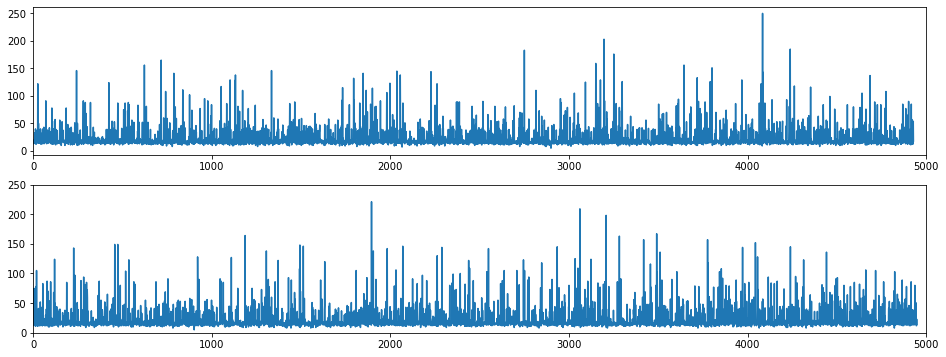

In [97]:
x = np.linspace(0, 5000, num = 1000)

fig, axs = plt.subplots(2, figsize = (16,6))
axs[0].plot(blue_wins_vision[['blueWardsPlaced']])
axs[0].set_xlim(0, 5000)
axs[1].set_ylim(0,250)


axs[1].plot(blue_losses_vision[['blueWardsPlaced']])
axs[1].set_xlim(0, 5000)
axs[1].set_ylim(0,250)

plt.show();

In [103]:
blue_wins_vision.sort_values(by='blueWardsPlaced', inplace=True)
blue_wins_vision.reset_index(inplace=True)
blue_losses_vision.sort_values(by='blueWardsPlaced', inplace=True)
blue_losses_vision.reset_index(inplace=True)

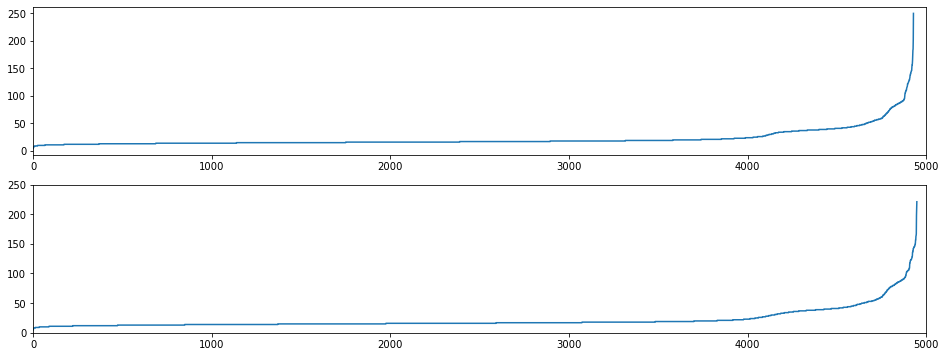

In [104]:
x = np.linspace(0, 5000, num = 1000)

fig, axs = plt.subplots(2, figsize = (16,6))
axs[0].plot(blue_wins_vision[['blueWardsPlaced']])
axs[0].set_xlim(0, 5000)
axs[1].set_ylim(0,250)


axs[1].plot(blue_losses_vision[['blueWardsPlaced']])
axs[1].set_xlim(0, 5000)
axs[1].set_ylim(0,250)

plt.show();